# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

from scipy.stats import linregress

from api_keys import weather_api_key
from citipy import citipy

## Generate Cities List

In [2]:
#lat & lng ranges
lat_range=(-90, 90)
lng_range=(-180,180)

#lists to hold location and cities
lat_lngs = []
cities = []

#random city selection
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#nearest city id for random selection
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #add to list if unique name
    if city not in cities:
        cities.append(city)

len(cities)

634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#OpenWeatherMap url + api key & modifications needed for call
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = weather_url + "appid=" + weather_api_key + "&units=" + units + "&q="

#print test city 
test = requests.get(f'{query_url}indianapolis').json()
display(test)

{'coord': {'lon': -86.158, 'lat': 39.7684},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 79.16,
  'feels_like': 79.16,
  'temp_min': 75.49,
  'temp_max': 82.74,
  'pressure': 1016,
  'humidity': 79},
 'visibility': 10000,
 'wind': {'speed': 4.61, 'deg': 300},
 'clouds': {'all': 75},
 'dt': 1627522513,
 'sys': {'type': 2,
  'id': 2037844,
  'country': 'US',
  'sunrise': 1627468805,
  'sunset': 1627520516},
 'timezone': -14400,
 'id': 4259418,
 'name': 'Indianapolis',
 'cod': 200}

In [4]:
# lists to hold data for df creation 
country = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []

city_list = []

#run loop & print data request for all cities from random list
counter = 0

print('Beginning Data Retrieval')
print('------------')

for city in cities:
    
    response=requests.get(query_url + city).json()
    
    try:
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        
        city_list.append(city)
        
        counter += 1
        
        print(f"Processing Records {counter} | {city}")
        
    except:
        print("City not found. Skipping.")
        pass
    
print('------------')
print('Data Retrieval Complete')
print('------------')

Beginning Data Retrieval
------------
City not found. Skipping.
Processing Records 1 | rikitea
Processing Records 2 | ponta do sol
Processing Records 3 | yellowknife
Processing Records 4 | namibe
Processing Records 5 | port elizabeth
Processing Records 6 | hasaki
Processing Records 7 | torbay
Processing Records 8 | mayumba
Processing Records 9 | tezu
Processing Records 10 | kamaishi
Processing Records 11 | lorengau
Processing Records 12 | narsaq
Processing Records 13 | khatanga
Processing Records 14 | algiers
Processing Records 15 | jamestown
Processing Records 16 | port alfred
Processing Records 17 | camacha
Processing Records 18 | mao
Processing Records 19 | saint-philippe
Processing Records 20 | bredasdorp
Processing Records 21 | malpe
Processing Records 22 | upernavik
Processing Records 23 | kavaratti
Processing Records 24 | heihe
Processing Records 25 | hermanus
Processing Records 26 | south sioux city
Processing Records 27 | cherskiy
Processing Records 28 | bethel
Processing Reco

Processing Records 223 | itoman
Processing Records 224 | cayenne
Processing Records 225 | fremont
Processing Records 226 | ilulissat
Processing Records 227 | hilo
City not found. Skipping.
Processing Records 228 | kavieng
City not found. Skipping.
Processing Records 229 | ezhou
Processing Records 230 | mackay
Processing Records 231 | sulina
Processing Records 232 | egvekinot
Processing Records 233 | rendsburg
Processing Records 234 | huayucachi
Processing Records 235 | iquique
Processing Records 236 | waldkirch
Processing Records 237 | zhezkazgan
Processing Records 238 | sur
Processing Records 239 | loukhi
Processing Records 240 | baneh
Processing Records 241 | pasni
Processing Records 242 | galle
Processing Records 243 | chokurdakh
Processing Records 244 | samarai
Processing Records 245 | leningradskiy
City not found. Skipping.
Processing Records 246 | myanaung
Processing Records 247 | santa maria
Processing Records 248 | nikolskoye
Processing Records 249 | hamilton
Processing Records

Processing Records 451 | nara
City not found. Skipping.
Processing Records 452 | san ramon
Processing Records 453 | alta floresta
Processing Records 454 | laishevo
Processing Records 455 | miguel alves
Processing Records 456 | east stroudsburg
City not found. Skipping.
Processing Records 457 | genhe
Processing Records 458 | phan thiet
Processing Records 459 | banjar
Processing Records 460 | ust-kulom
Processing Records 461 | rawah
Processing Records 462 | hofn
Processing Records 463 | derzhavinsk
Processing Records 464 | qasigiannguit
Processing Records 465 | maniitsoq
City not found. Skipping.
Processing Records 466 | tottori
Processing Records 467 | sept-iles
Processing Records 468 | linden
Processing Records 469 | santa cecilia
Processing Records 470 | gannan
Processing Records 471 | barra patuca
Processing Records 472 | wewak
Processing Records 473 | blatna
Processing Records 474 | micheweni
City not found. Skipping.
Processing Records 475 | touros
Processing Records 476 | uyemskiy

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create df
city_df = pd.DataFrame({'City': city_list,
                       'Country': country,
                       'Lat': lat,
                       'Lng': lng,
                       'Max Temp': max_temp,
                       'Humidity': humidity,
                       'Cloudiness': cloudiness,
                       'Wind Speed': wind_speed,
                       'Date': date})
display(city_df)

#export df to csv
output_df = "../output_data/cities.csv"
city_df.to_csv(output_df, encoding="utf-8", index=False)

,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,rikitea,PF,-23.1203,-134.9692,73.56,82,69,13.04,1627522513
1,ponta do sol,PT,32.6667,-17.1000,72.23,79,16,6.04,1627522051
2,yellowknife,CA,62.4560,-114.3525,67.28,67,75,1.01,1627522514
3,namibe,AO,-15.1961,12.1522,62.98,87,5,3.15,1627522093
4,port elizabeth,ZA,-33.9180,25.5701,53.89,82,0,8.05,1627522043
...,...,...,...,...,...,...,...,...,...
577,kharitonovo,RU,61.4009,47.4978,55.18,68,55,3.33,1627522644
578,aljezur,PT,37.3191,-8.8033,62.10,88,0,9.35,1627522645
579,kashi,CN,39.4547,75.9797,85.21,28,40,8.95,1627522645
580,khandagayty,RU,50.7333,92.0500,61.34,55,5,2.98,1627522645


In [6]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,5.820000e+02
mean,19.658626,22.526873,69.515395,70.589347,50.216495,7.575945,1.627522e+09
std,32.775893,89.808337,14.550003,19.521331,40.009008,5.189105,2.721462e+02
min,-54.800000,-179.166700,26.830000,11.000000,0.000000,0.000000,1.627522e+09
25%,-7.379050,-56.125100,58.292500,60.000000,6.250000,3.515000,1.627522e+09
50%,22.655800,29.970250,71.990000,74.000000,46.000000,6.465000,1.627523e+09
75%,48.108575,102.044950,80.997500,86.000000,95.000000,10.210000,1.627523e+09
max,78.218600,179.316700,105.300000,100.000000,100.000000,25.520000,1.627523e+09


## Inspect the data and remove the cities where the humidity > 100%.

In [7]:
city_df['Humidity'].value_counts().nlargest(n=1)

82    23
Name: Humidity, dtype: int64

Max humidity is not above 100%. No outliers that need to be removed. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

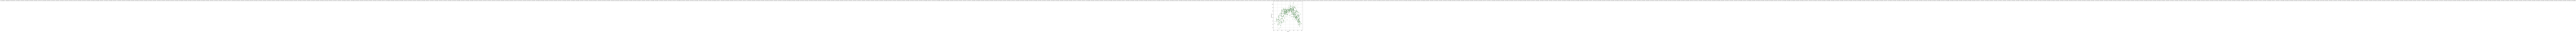

In [41]:
fig=plt.figure(figsize=(10,10))
x = city_df['Lat']
y = city_df['Max Temp']

plt.scatter(x, y, c='green', edgecolor='gray')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.title(f'City Latitude vs. Temperature (F) ({date})')

fig.savefig('../output_data/Lat_v_Temp.png')
# plt.figure(figsize=(10,10))
# plt.savefig = "../output_data/Lat_v_WindSpeed.png"
#plt.show()
#plt.savefig("../output_data/Lat_v_Temp.png")
#plt.figure(figsize=(10,2))
plt.show()

## Latitude vs. Humidity Plot

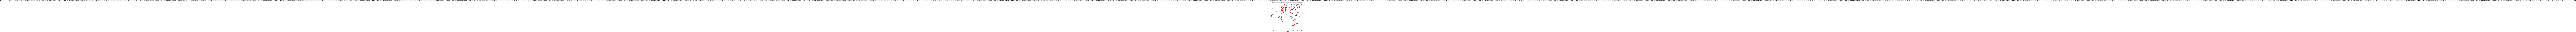

In [42]:
fig=plt.figure(figsize=(10,10))
x_values = city_df['Lat']
y_values = city_df['Humidity']

plt.scatter(x_values, y_values, c='red', edgecolor='gray')
plt.title(f'City Latitude vs. Humidity ({date})')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')

fig.savefig("../output_data/Lat_v_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

In [ ]:
fig=plt.figure(figsize=(10,10))
x_values = city_df['Lat']
y_values = city_df['Cloudiness']
plt.scatter(x_values, y_values, c='purple', edgecolor='gray')
plt.title(f'City Latitude vs. Cloudiness (%) ({date})')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

fig.savefig("../output_data/Lat_v_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

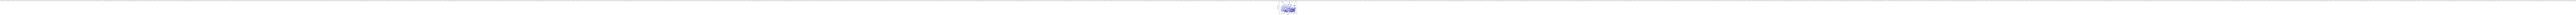

In [27]:
fig=plt.figure(figsize=(10,10))
x_values = city_df['Lat']
y_values = city_df['Wind Speed']

plt.scatter(x_values, y_values, c='blue', edgecolor='gray')
plt.title(f'City Latitude vs. Wind Speed (%) ({date})')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')

fig.savefig("../output_data/Lat_v_WindSpeed.png")
plt.show()

## Linear Regression

In [12]:
def regressplot(x, y):
    correlation = st.pearsonr(x,y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,'r-')
    return line_eq

In [13]:
north = city_df.loc[city_df['Lat'] >= 0]
south = city_df.loc[city_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

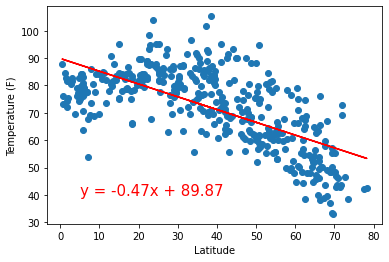

In [36]:
fig=plt.figure(figsize=(10,10))
line_eq = regressplot(x=north['Lat'], y=north['Max Temp'])
plt.annotate(line_eq, (5,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

fig.savefig("../output_data/North_Hem_Temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

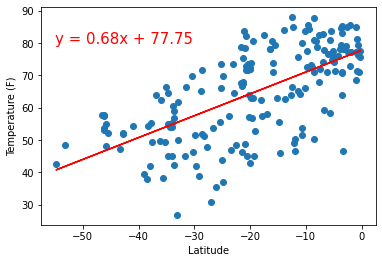

In [15]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=south['Lat'], y=south['Max Temp'])
plt.annotate(linear_regress, (-55,80), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

fig.savefig("../output_data/South_Hem_Temp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

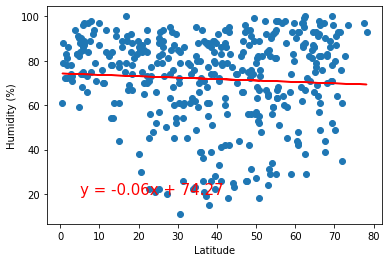

In [16]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=north['Lat'], y=north['Humidity'])
plt.annotate(linear_regress, (5,20), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

fig.savefig("../output_data/North_Humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

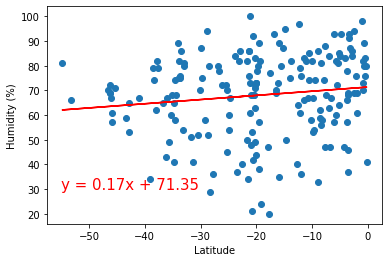

In [17]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=south['Lat'], y=south['Humidity'])
plt.annotate(linear_regress, (-55,30), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

fig.savefig("../output_data/South_Humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

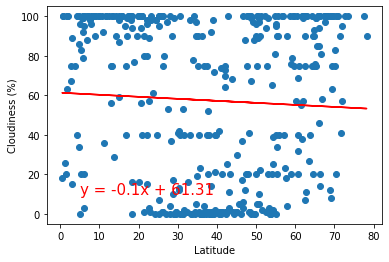

In [18]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=north['Lat'], y=north['Cloudiness'])
plt.annotate(linear_regress, (5,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

fig.savefig("../output_data/North_Cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

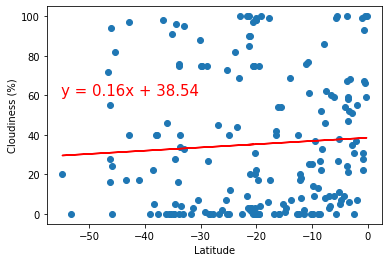

In [19]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=south['Lat'], y=south['Cloudiness'])
plt.annotate(linear_regress, (-55,60), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

fig.savefig("../output_data/South_Cloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

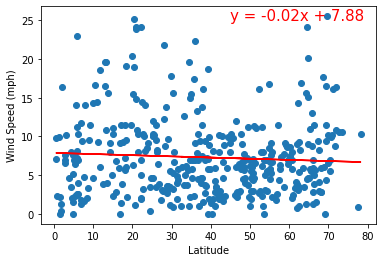

In [20]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=north['Lat'], y=north['Wind Speed'])
plt.annotate(linear_regress, (45,25), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

fig.savefig("../output_data/North_Wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

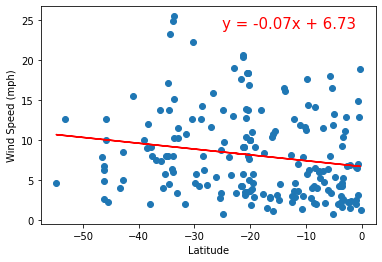

In [21]:
fig=plt.figure(figsize=(10,10))
linear_regress = regressplot(x=south['Lat'], y=south['Wind Speed'])
plt.annotate(linear_regress, (-25,24), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

fig.savefig("../output_data/South_Wind.png")
plt.show()